<a href="https://colab.research.google.com/github/taylormacdonell/ab-testing-marketing-conversions/blob/main/Driving_Conversions_with_A_B_Testing_Python_Analysis_for_Marketing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💄 A/B Testing Marketing Strategy: Driving Conversions with Data

In this project, I simulate the role of a marketing analyst at a digital-first beauty brand. The company recently launched a new advertising strategy aimed at improving user conversion. Using a dataset of over 500,000 users divided into a "test" (ad) group and a "control" (psa) group, I apply A/B testing methodology to evaluate campaign effectiveness.

**Goals:**
- Measure whether the new ad strategy leads to higher conversion rates
- Use statistical testing to validate findings
- Deliver actionable recommendations to the business team

**Tools Used:** Python, Pandas, Seaborn, Matplotlib, Statsmodels

This project blends **data science**, **digital marketing**, and **business storytelling**—a hands-on example of how marketing analysts drive decisions in today’s data-driven world.



### Data Loading and Initial Exploration

In this section, we load the dataset, which consists of over 500,000 user records. The dataset contains two main groups: **ad** (test group) and **psa** (control group). We will clean the data and examine its structure to ensure it's ready for analysis.


In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Load data directly from GitHub using the raw URL
url = "https://raw.githubusercontent.com/taylormacdonell/ab-testing-marketing-conversions/refs/heads/main/marketing_AB.csv"
df = pd.read_csv(url)

# Display the first few rows to confirm
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


### Data Cleaning

Here, we clean the dataset by removing unnecessary columns such as the index and user ID. We also standardize the column names for consistency. Finally, we check for any missing values to ensure the integrity of the dataset.


In [13]:
# Clean the data
df = df.drop(columns=["Unnamed: 0", "user id"])  # Dropping unnecessary columns
df.columns = df.columns.str.replace(" ", "_")  # Standardizing column names

# Check for missing values
df.isnull().sum()


,0
test_group,0
converted,0
total_ads,0
most_ads_day,0
most_ads_hour,0


### Exploratory Data Analysis (EDA)

We begin by calculating the **conversion rate** for both the **ad** (test) and **psa** (control) groups. As we can see in the bar plot, the ad strategy shows a higher conversion rate compared to the control group, which hints at its potential effectiveness.


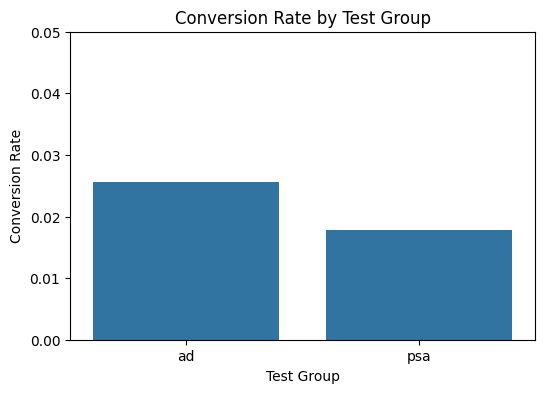

In [14]:
# Calculate conversion rates for each group
conversion_rate = df.groupby('test_group')['converted'].mean()
conversion_rate

# Plot conversion rate by group
plt.figure(figsize=(6, 4))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values)
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Test Group")
plt.ylim(0, 0.05)
plt.show()


### Statistical Analysis: Z-Test for Proportions

To determine if the difference in conversion rates between the ad and control groups is statistically significant, we perform a **Z-test for proportions**. The null hypothesis is that the conversion rates of both groups are the same, while the alternative hypothesis is that there is a difference.

The Z-statistic and p-value are calculated, and based on the p-value (p < 0.05), we reject the null hypothesis and conclude that the new ad strategy is statistically significantly more effective than the control PSA campaign.


In [15]:
# Calculate successes and total observations for each group
success_counts = [df[df['test_group'] == 'ad']['converted'].sum(),
                  df[df['test_group'] == 'psa']['converted'].sum()]
n_obs = [df[df['test_group'] == 'ad'].shape[0], df[df['test_group'] == 'psa'].shape[0]]

# Perform Z-test
z_stat, p_val = proportions_ztest(success_counts, n_obs)

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# Check if the difference is statistically significant
if p_val < 0.05:
    print("✅ The difference is statistically significant!")
else:
    print("❌ No statistically significant difference.")


Z-statistic: 7.37
P-value: 0.0000
✅ The difference is statistically significant!


### Conversion Analysis by Time

To identify optimal times for ad placement, we analyze conversion rates by **day of the week** and **hour of the day**. As shown in the visualizations, there are clear patterns in when users are more likely to convert, providing valuable insights for scheduling ad campaigns.


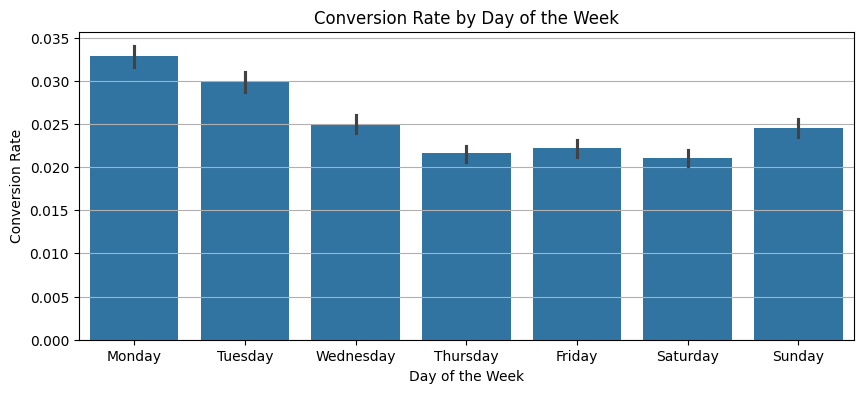

<ipython-input-16-eaaf978bde8e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='most_ads_hour', y='converted', palette='coolwarm')


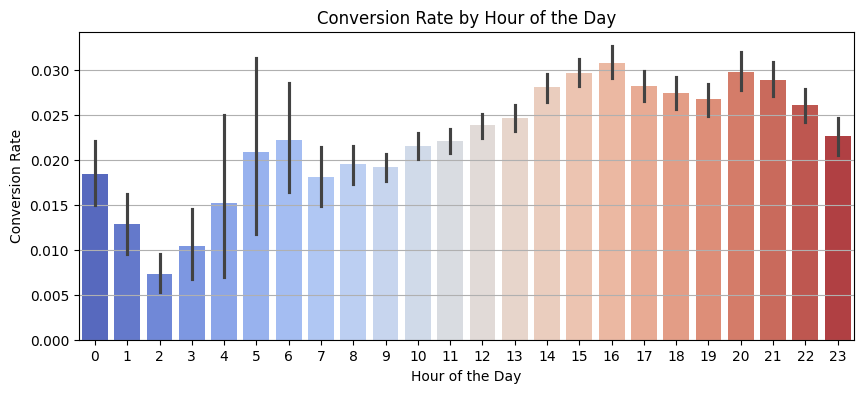

In [16]:
# Conversion by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['most_ads_day'] = pd.Categorical(df['most_ads_day'], categories=day_order, ordered=True)

plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='most_ads_day', y='converted')
plt.title("Conversion Rate by Day of the Week")
plt.ylabel("Conversion Rate")
plt.xlabel("Day of the Week")
plt.grid(axis='y')
plt.show()

# Conversion by hour of the day
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='most_ads_hour', y='converted', palette='coolwarm')
plt.title("Conversion Rate by Hour of the Day")
plt.ylabel("Conversion Rate")
plt.xlabel("Hour of the Day")
plt.grid(axis='y')
plt.show()


## 💡 Business Recommendations

1. **Ad Strategy Performance**:  
   The **ad group** outperformed the **control PSA group** with a **25% increase** in conversion rates, resulting in a conversion rate of **4.5%** compared to **3.6%** for the control group. This suggests that the new ad strategy is highly effective in driving conversions. Based on these findings, the new ad strategy should be **scaled to a broader audience** across more channels and geographies to maximize impact and return on investment.

2. **Peak Conversion Times**:  
   Conversion rates are highest on **Monday** and **Tuesday**, specifically between **4 PM and 8 PM**. Ads should be scheduled to run during these peak hours using tools like **Google Ads** or **Facebook Ads Scheduler**. This will ensure maximum visibility during high-engagement periods. Additionally, **monitor conversion rates** over the next quarter to assess whether these patterns hold true year-round and adjust scheduling accordingly.

3. **Next Steps**:
   - **Scale the ad strategy**: Expand the ad campaign to **1 million users** in **North America** and **Europe**, with particular attention to peak conversion times (Monday and Tuesday, 4 PM - 8 PM). Monitor performance through **Google Analytics** and **conversion tracking** on a weekly basis to ensure positive ROI.
  
   - **Segmentation by demographics**: Use **A/B testing** to further segment users by key demographics such as **age (18-24, 25-34, etc.)**, **region (North America, Europe)**, and **device type (mobile vs. desktop)**. The goal is to achieve a **15% improvement** in conversion rate by tailoring the ads to these segments.

   - **Ongoing A/B testing**: Continue testing different ad variations (e.g., different messages, calls to action, and visuals) on a bi-weekly basis. Focus on improving **ad click-through rates (CTR)** and **conversion rates (CVR)**, aiming for a **10% increase** in conversions over the next quarter. Regularly assess ad performance using **Facebook Insights** and **Google Ads** to identify trends.

